<a href="https://colab.research.google.com/github/Muskancodes21/Machine-Learning-Fake-News-Detection-/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load datasets
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

# Label the data
fake_df['label'] = 'fake'
true_df['label'] = 'real'

# Combine
combined_df = pd.concat([fake_df, true_df], ignore_index=True)

# Combine title and text
combined_df['full_text'] = combined_df['title'] + " " + combined_df['text']
combined_df = combined_df.dropna(subset=['full_text', 'label'])

# Encode labels
le = LabelEncoder()
combined_df['encoded_label'] = le.fit_transform(combined_df['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    combined_df['full_text'],
    combined_df['encoded_label'],
    test_size=0.2,
    random_state=42
)

# Vectorize with BOW
vectorizer = CountVectorizer(stop_words='english', max_df=0.7, max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# SVM training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_bow, y_train)

# Evaluation
y_pred = svm_model.predict(X_test_bow)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9950
Classification Report:
              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4733
        real       1.00      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       1.00      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Accuracy: 0.968
F1 Score: 0.9670781893004116
Classification Report:
               precision    recall  f1-score   support

        fake       0.98      0.95      0.97       522
        real       0.95      0.98      0.97       478

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



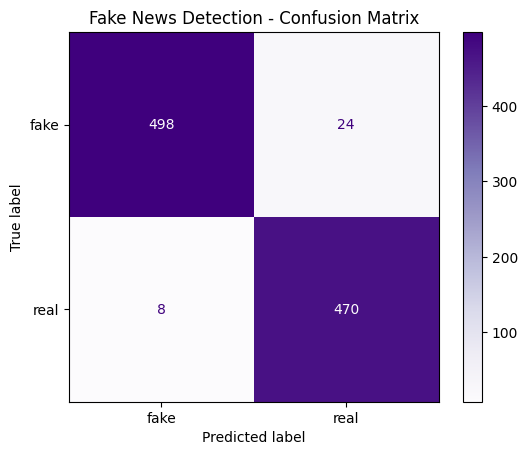

Model saved as logreg_basic_clean_model.pkl
Prediction: fake


In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt


fake_df = pd.read_csv("Fake.csv", on_bad_lines='skip')
true_df = pd.read_csv("True.csv", on_bad_lines='skip')

fake_df['label'] = 'fake'
true_df['label'] = 'real'

df = pd.concat([fake_df, true_df]).sample(frac=1, random_state=42)
df['full_text'] = (df['title'] + " " + df['text']).str.lower()
df = df.dropna(subset=['full_text'])


le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])


df = df.sample(n=5000, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(
    df['full_text'], df['encoded_label'],
    test_size=0.2, stratify=df['encoded_label'],
    random_state=42
)


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Purples')
plt.title("Fake News Detection - Confusion Matrix")
plt.show()





sample = ["Aliens have taken over New York City!"]
pred = pipeline.predict(pd.Series(sample))
print("Prediction:", le.inverse_transform(pred)[0])